<a href="https://colab.research.google.com/github/nobu-n2002/CFD2023_image_processing/blob/main/ibm_imageprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Preprocessing for Immersed Boundary Method

In this notebook, general image processing is applied to 2D image images and applied to a numerical simulation programme using the new flow basis equations presented below.

## Basic equation

Law of conservation of mass:
\begin{align}
\frac{\partial \rho \varepsilon}{\partial t}+\boldsymbol{\bigtriangledown} \cdot \rho \varepsilon \boldsymbol{u} = 0
\end{align}

Law of conservation of momentum:
\begin{align}
\frac{\partial \rho \varepsilon \boldsymbol{u}}{\partial t}+\bigtriangledown \cdot \rho \varepsilon \boldsymbol{u} \boldsymbol{u}
= -\varepsilon\bigtriangledown p + \bigtriangledown\cdot \varepsilon \boldsymbol{T} + \boldsymbol{f}\\
\boldsymbol{T} = \nu(\bigtriangledown\boldsymbol{u}+\bigtriangledown\boldsymbol{u}^t)+\lambda (\bigtriangledown\cdot\boldsymbol{u})\boldsymbol{I}
\end{align}

Defenition of porosity distribution:

\begin{align}
\displaystyle \varepsilon = \frac{1}{2} \tanh(x) + \frac{1}{2},  x = \frac{\xi}{thickness}
\end{align}

where $\xi$ is the distance function.

# 1. Preparation before execution

In [ ]:
# @title Mount drive

# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Importing non-standard modules into Colabo

# pyheif : use to convert heic files to png
!pip install pyheif

# pygista : use to visualise vtk files
!apt-get install -qq xvfb libgl1-mesa-glx
!pip install pyvista -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 45.2 MB/s eta 0:00:00
Selecting previously unselected package libfontenc1:amd64.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack .../0-libfontenc1_1%3a1.1.4-1build3_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-1build3) ...
Selecting previously unselected package libgl1-mesa-glx:amd64.
Preparing to unpack .../1-libgl1-mesa-glx_23.0.4-0ubuntu1~22.04.1_amd64.deb ...
Unpacking libgl1-mesa-glx:amd64 (23.0.4-0ubuntu1~22.04.1) ...
Selecting previously unselected package libxfont2:amd64.
Preparing to unpack .../2-libxfont2_1%3a2.0.5-1build1_amd64.deb ...
Unpacking libxfont2:amd64 (1:2.0.5-1build1) ...
Selecting previously unselected package libxkbfile1:amd64.
Preparing to unpack .../3-libxkbfile1_1%3a1.1.0-1build3_amd64.deb ...
Unpacking libxkbfile1:amd64 (1:1.1.0-1build3) ...
Selecting previously unselected package x11-xkb-utils.
Preparing to unpack .../4-x11-xkb-utils_7.7+5build4_amd64

# 2. Image processing

The image file is converted to greyscale and the blur is used as a distance function variant to output a porosity distribution.


create a tmp folder
00000137.jpg successfully readed


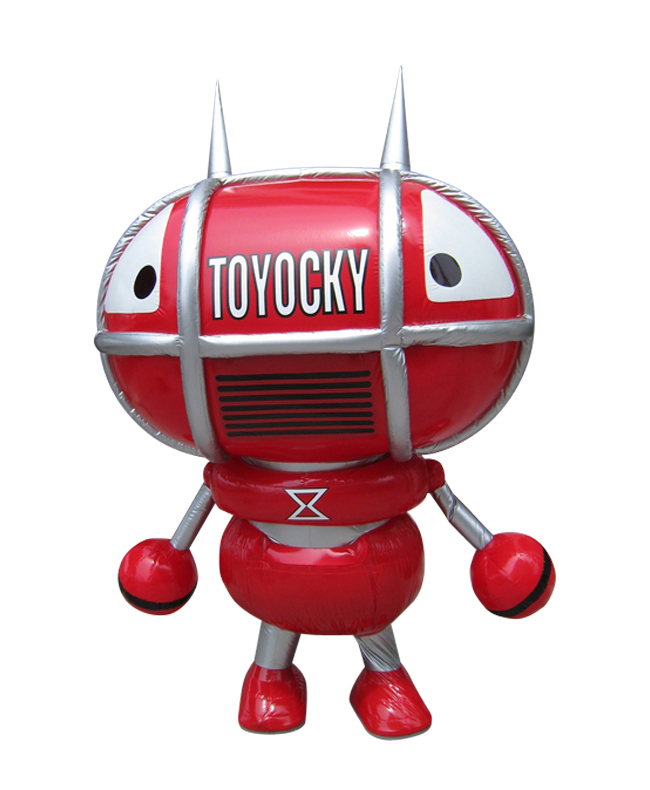

In [ ]:
# @title File input { vertical-output: true, display-mode: "form" }

# import modules
import os
import sys
import glob

from IPython.display import Image as disp
from PIL import Image
import pyheif

if os.path.exists('tmp'):
    pass
else:
    print('create a tmp folder')
    os.mkdir('tmp')

FILE = "/content/drive/MyDrive/Labo/\u8A08\u7B97\u529B\u5B66\u8B1B\u6F14\u4F1A/toyocky/00000137.jpg" # @param {type:"string"}

#@markdown # Original Image

def heif_to_image(path):
    heif_file = pyheif.read(path)
    img = Image.frombytes(heif_file.mode,
                          heif_file.size,
                          heif_file.data,
                          "raw",
                          heif_file.mode,
                          heif_file.stride,)
    print('heic successfully converted into png')
    return img

if os.path.exists(FILE):
    file = FILE.split('/')[-1]
    file_name = file.split('.')[0]
    file_type = file.split('.')[1]

    if file_type == 'heic' or file_type == 'HEIC':
      img = heif_to_image(FILE)
      img.save("./tmp/%s.png"%(file_name), "PNG")
      FILE =  "./tmp/%s.png"%(file_name)

    print('%s successfully readed'%(file))
    display(disp(FILE, width=500))
else:
    sys.exit('No file input')

## Resize

Resizing is done by the function `resize` of the OpenCV module. This function can scale an image by giving a scale factor. For example, a scale factor of 0.5 on a 100x100 image results in a 50x50 image.

Therefore, in order to convert an image to an arbitrary resolution, it is sufficient to know this scale factor. Let $\rm{(W, H)}$ denote the number of pixels in the original image and $\rm{(W', H')}$ the number of pixels in the converted image. Resolution is the total number of pixels, so if the original resolution is $\rm{R}$, the following equation holds.

$$ \rm{R} = WH$$.

Here, the number of pixels in the height and width of the converted image $\rm{(W', H')}$ is defined using the scale factor $s( > 0)$ and $\rm{(W, H)}$ as follows.

$$ \rm{(W', H')} = (\textit{s}\rm{W}, \textit{s}\rm{H})$$.

This allows the transformed resolution $\rm{R'}$ to be expressed as follows.

$$ \rm{R'} = W'H' = s^2\rm{WH} $$

Solving this for $s$, we obtain.

$$ s = \sqrt{\frac{R'}{WH}} $$

Therefore, given an arbitrary resolution, the coefficient $s$ can be obtained and resizing can be performed. Run the code block below and set the resolution by changing the slider bar of `resolution`. The last value you set will be the resolution used in the following program. The images are stored in the `tmp` folder.

Original resolution :  (790, 650)
Processed resolution :  (400, 400)
Scale :  0.3361
Save the figure in /content/tmp/resized.png


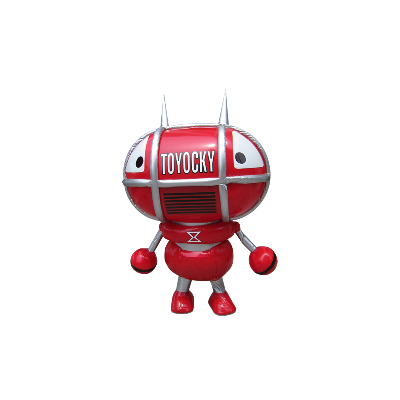

In [ ]:
# @title Resize { run: "auto", vertical-output: true, display-mode: "form" }
# { run: "auto", vertical-output: true, display-mode: "form" }

# import modules
import math
import cv2
import os

from IPython.display import Image

# make a tmp folder
if os.path.exists('tmp'):
    pass
else:
    print('create a temp folder')
    os.mkdir('tmp')

resolution = 160000 # @param {type:"slider", min:10000, max:250000, step:1000}
margin = 200 # @param {type:"slider", min:0, max:1000, step:10}

#@markdown # Resize

CWD = os.getcwd() # corrent path

# read an image resized
src = cv2.imread(FILE, cv2.IMREAD_UNCHANGED)
h_ori, w_ori = src.shape[0:2]
print('Original resolution : ', src.shape[0:2])

margin_type = "surroundings" # @param ["x_direction", "surroundings"]
square = True # @param ["True", "False"] {type:"raw"}
x = 0
y = 0
margin_factor_x = 0
margin_factor_y = 0

if square:
  margin_factor_x = 0
  margin_factor_y = 0
  tmp = h_ori - w_ori
  if tmp <= 0:
    x = int(tmp/2)
  else:
    y = int(tmp/2)
  img = cv2.copyMakeBorder(src, margin*margin_factor_x + x, margin*margin_factor_x + x, margin*margin_factor_y + y, margin*margin_factor_y + y, cv2.BORDER_CONSTANT, value=[255,255,255])

if margin_type == "surroundings":
  margin_factor_x = 1
  margin_factor_y = 1
elif  margin_type == "x_direction":
  margin_factor_x = 0
  margin_factor_y = 1

# add margin
img = cv2.copyMakeBorder(src, margin*margin_factor_x + x, margin*margin_factor_x + x, margin*margin_factor_y + y, margin*margin_factor_y + y, cv2.BORDER_CONSTANT, value=[255,255,255])
# img = cv2.copyMakeBorder(src, margin, margin, margin, margin, cv2.BORDER_CONSTANT, value=[255,255,255])
h, w = img.shape[:2]

# calculate scale factor
scale = math.sqrt(resolution/ (w * h))
file_name_resized = "%s/tmp/resized.png" %(CWD)

if scale >= 1.0:
    print('\nA value greater than the original resolution has been set.')
    print('Please reset the resolution smaller than %d'%(h*w))
else:
    dst = cv2.resize(img, dsize=None, fx=scale, fy=scale)
    cv2.imwrite(file_name_resized, dst)
    print('Processed resolution : ', dst.shape[0:2])
    print('Scale : ', format(scale,"0.4"))
    print('\033[32m'+'Save the figure in %s' %(file_name_resized)+'\033[0m')
    display(Image(file_name_resized, width=500))

### Grayscale

Grayscaling can be easily achieved by loading the previously resized image using OpenCV's `IMREAD_GRAYSCALE` function. Here, we explain what is done inside the image during the grayscaling process.

First, each pixel in the image has a specific RGB (Red, Green, Blue) value. For each colour, 256 ($=2^8=16^2$) steps from 0 to 255 are set. By performing the following operations on these RGB values, a grayscale image can be generated.

$$ \rm{Gray} = Red \times 0.229 + Green\times0.587 +Blue\times0.114 $$

The following block of code (the greyscale tester) is a program that, given appropriate RGB values, produces an original 100x100 image on the left and a greyscaled image on the right. Try various values.

Also, in the threshold part, the program says that if the value in the pixel is smaller than the value of `threshold`, it is set to 255 (white).

rm: missing operand
Try 'rm --help' for more information.


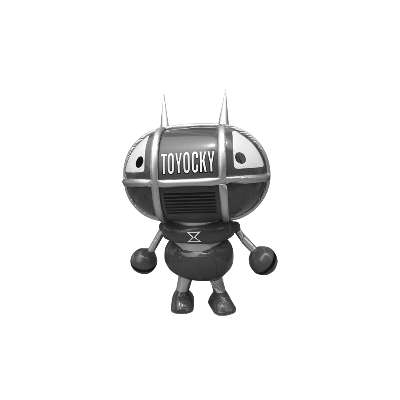

Completed


In [ ]:
# @title Grayscale and Threshold { run: "auto", vertical-output: true }

from IPython.display import Image
import matplotlib.pyplot as plt
import cv2
import os

CWD = os.getcwd()
file_name_resized = "%s/tmp/resized.png" %(CWD)

# read the resized image
IMG = cv2.imread(file_name_resized,cv2.IMREAD_GRAYSCALE)

threshold = 250 # @param {type:"slider", min:0, max:255, step:1}
inverse = False # @param ["True", "False"] {type:"raw"}

#@markdown # Grayscale and Threshold

height, width = IMG.shape[:2]
# print('IMG (w, h) = ', width, height)

IMG_GRAY = IMG

# thresholding
for i in range(height):
  for j in range(width):
    if IMG[i][j] > threshold:
        IMG_GRAY[i][j] = 255.0

# inverse
if inverse:
  IMG_GRAY_INVERSE = 255.0 - IMG_GRAY
  print('Input image successfully inversed')

filename_gray = "%s/tmp/gray.png"%(CWD)
if os.path.exists(filename_gray):
  !rm $filename_gray_rm

if inverse:
  cv2.imwrite(filename_gray,IMG_GRAY_INVERSE)
else:
  cv2.imwrite(filename_gray,IMG_GRAY)
display(Image(filename_gray, width=500))

print('Completed')

Outline


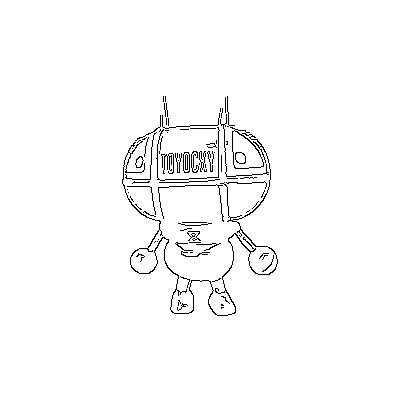

composite image


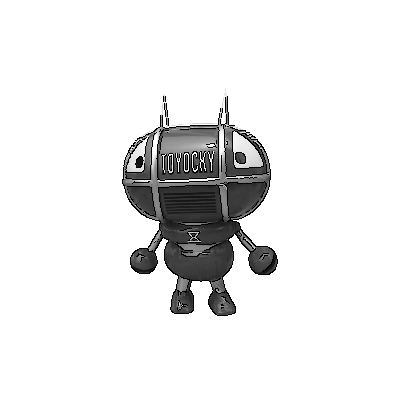

In [ ]:
# @title Option: outline { run: "auto", vertical-output: true }
import cv2
import numpy as np

threshold1 = 172 # @param {type:"slider", min:0, max:500, step:1}
threshold2 = 283 # @param {type:"slider", min:0, max:500, step:1}

CWD = os.getcwd()
file_name_gray = "%s/tmp/gray.png" %(CWD)
# read the resized image
IMG = cv2.imread(file_name_gray,cv2.IMREAD_GRAYSCALE)

file_name_outline = "%s/tmp/outline.png" %(CWD)

# edge detection
edges_inverse = cv2.Canny(IMG, threshold1, threshold2)
edges = 255.0 - edges_inverse
cv2.imwrite(file_name_outline, edges)
print('Outline')
display(Image(file_name_outline, width=500))

file_name_com = "%s/tmp/com.png" %(CWD)

# normalize (0~1) edges
# 0 -> black, 1 -> white
com = edges/255.0

# IMG is grayscale image
com = IMG*com
cv2.imwrite(file_name_com, com)
print('composite image')
display(Image(file_name_com, width=500))


### Boundary area

Defenition of porosity distribution:

\begin{equation}
\displaystyle \varepsilon = \frac{1}{2} \tanh(x) + \frac{1}{2},\   x = \frac{\xi}{thickness}
\end{equation}

where $\xi$ is the distance function.

The gradient of ε is calculated as follows.

\begin{array}{rcl}
\displaystyle
\frac{\partial \varepsilon}{\partial x}
&=& \frac{\partial}{\partial x} \left(\frac{1}{2}\frac{e^x-e^{-x}}{e^x+e^{-x}}+\frac{1}{2}\right)\\
&=& \frac{2}{(e^x+e^{-x})^2}\\
&=& 2\frac{-(e^{2x}-2+e^{-2x})+(e^{2x}+2+e^{-2x})}{4(e^{x}+e^{-x})^2}\\
&=& 2\left[\frac{1}{2}\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}+\frac{1}{2}-\left(\frac{1}{2}\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}+\frac{1}{2}\right)^2\right]\\
&=& 2\varepsilon (1-\varepsilon)\\
\end{array}

Therefore, the gradient of ε has the following proportionality.

\begin{align}
\displaystyle
\frac{\partial \varepsilon}{\partial x} \propto \varepsilon (1-\varepsilon)
\end{align}

Here, the integral of the gradient of the porosity distribution is defined as the boundary area $S_b$, which is the quantitative value of complexity. Assume that the porosity distribution is a rectangle of length H and width W, and that its area is A.

\begin{align}
S_b
&=\int_{A}{\varepsilon(1-\varepsilon)}dA\\
&=\int_0^W\int_0^H{\varepsilon(1-\varepsilon)}dhdw\\
&=\sum_{j=0}^W\sum_{i=0}^H{\varepsilon_{i,j}(1-\varepsilon_{i,j})}
\end{align}

SPOT DETECTED:  0
Complete
Boundary area =  3924.15
make a file for display


100%|██████████| 400/400 [00:00<00:00, 1189.10it/s]


make a porosity distribution


100%|██████████| 400/400 [00:00<00:00, 1337.92it/s]


write porosity distribution


100%|██████████| 400/400 [00:00<00:00, 823.70it/s]


Complete


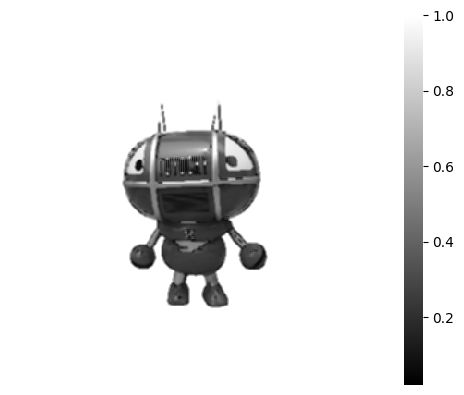

---------------- Processing Results ----------------
Setting resolution  =  160000 (400, 400)
Porosity resolution =  160000 (400, 400)
Threshold     :  250
Minimum value :  1e-06
Shade factor  :  1
Kernel size   :  3
Boundary area =  3924.1464667435603
-----------------------------------------------------


In [ ]:
# @title Blur and make porosity { run: "auto", vertical-output: true }
import seaborn as sns
import numpy as np
from tqdm import tqdm
import csv

outline = True # @param ["True", "False"] {type:"raw"}

CWD = os.getcwd()

if outline:
  # read resolution (h, w)
  file_name_com = "%s/tmp/com.png" %(CWD)
  IMG = cv2.imread(file_name_com,cv2.IMREAD_GRAYSCALE)
  height, width = IMG.shape[:2]
else:
  # read resolution (h, w)
  file_name_th = "%s/tmp/gray.png"%(CWD)
  IMG = cv2.imread(file_name_th,cv2.IMREAD_GRAYSCALE)
  height, width = IMG.shape[:2]

ksize = 3  # @param {type:"integer"}

# bluring
if inverse:
  IMG_BLUR_MEDIAN = cv2.medianBlur(IMG, ksize=3)
  IMG_BLUR = cv2.blur(IMG_BLUR_MEDIAN, ksize=(ksize, ksize))
else:
  IMG_BLUR_MEDIAN = cv2.medianBlur(IMG, ksize=3)
  IMG_BLUR = cv2.blur(IMG_BLUR_MEDIAN, ksize=(ksize, ksize))

IMG_BLUR_NORM = np.ones((height, width), np.float64)

# normalize
for i in range(height):
  for j in range(width):
    IMG_BLUR_NORM[i][j] = IMG_BLUR[i][j] / 255.0

# Divergence control of porosity distributions
div = 250 # @param {type:"slider", min:0, max:255, step:1}
max_div = div/255
spot = 0
for i in range(height):
  for j in range(width):
    if i + 2 > height or j + 2 > width:
        pass
    else:
        n = IMG_BLUR_NORM[i-1][j] - IMG_BLUR_NORM[i][j]
        s = IMG_BLUR_NORM[i+1][j] - IMG_BLUR_NORM[i][j]
        w = IMG_BLUR_NORM[i][j-1] - IMG_BLUR_NORM[i][j]
        e = IMG_BLUR_NORM[i][j+1] - IMG_BLUR_NORM[i][j]
        if abs(n) > max_div or abs(s) > max_div\
            or abs(w) > max_div or abs(e) > max_div:
            spot += 1
            IMG_BLUR_NORM[i][j] = IMG_BLUR_NORM[i-1:i+2,j-1:j+2].mean()

print('SPOT DETECTED: ', spot)
print('Complete')

S = np.sum(IMG_BLUR_NORM - IMG_BLUR_NORM**2)
print("Boundary area = ", format(S, ".2f"))

shade_factor = 1 # @param {type:"integer"}
small = 1.0e-6 # @param {type:"raw"}

# ----

# initialization
data_write = np.empty((int(height+1),int(width)),dtype=object)
data_display = IMG_BLUR_NORM

#@markdown # Porosity Distribution

print('make a file for display')
for i in tqdm(range(height)):
  for j in range(width):
    x = max(small, IMG_BLUR_NORM[i][j] ** shade_factor)
    data_display[i][j] = x

data_write[0][0] = width
data_write[0][1] = height

print('make a porosity distribution')
for i in tqdm(range(height)):
  for j in range(width):
    data_write[i+1][j] = format(1.0, '.4E')

# Write porosity distribution
print('write porosity distribution')
for i in tqdm(range(height)):
  for j in range(width):
    x = max(small, IMG_BLUR_NORM[i][j] ** shade_factor)
    data_write[i+1][j] = format(x,'.4E')

with open('porosity.csv', 'w', newline='') as csvfile:
    reader  = csv.writer(csvfile)
    reader.writerows(data_write)

with open('process.txt','w',encoding='utf-8') as f:
    print('---------------- Processing Results ----------------', file=f)
    print('Setting resolution  = ', IMG_BLUR_NORM.shape[0]*IMG_BLUR_NORM.shape[1], IMG_BLUR_NORM.shape, file=f)
    print('Porosity resolution = ', (data_write.shape[0]-1)*data_write.shape[1], data_write[1:,:].shape, file=f)
    print('Threshold     : ', threshold,file=f)
    print('Minimum value : ', small,file=f)
    print('Shade factor  : ', shade_factor,file=f)
    print('Kernel size   : ', ksize,file=f)
    print('Boundary area = ', S, file=f)
    print('-----------------------------------------------------',file=f)

print('Complete')

sns.heatmap(data_display, cmap="gray", xticklabels=False, yticklabels=False, square=True)
plt.savefig('tmp/file_porosity.png')
plt.show()

!cat process.txt

# 3. CFD

Program for laminar flow calculations of the MAC algorithm using the Immersed boundary method.
### controlDict settings

A controlDict.txt file enables to change some values from it. We need not recompile the program when we change any variables because of using namelist.  
\begin{align}
&CFL = \frac{U\Delta t}{\Delta x} \leq 1 &\\
&Re = \frac{Ul}{\nu} = \frac{\rho Ul}{\mu}\\
&Pe = \frac{U\Delta x}{\nu} < 2\\
&D = \frac{\nu\Delta t}{\Delta x^2} \leq \frac{1}{2}
\end{align}

Where,  
$U$ = Inlet velocity  
$l$ = Representative length in flow direction  
$\nu$ = Kinematic viscosity  
$\mu$ = Dynamic viscosity  
$\rho$ = Density of the fluid

Large Peclet numbers mean that the advection term is dominant, which can lead to unstable calculations. As the program uses central differences, the stability condition for the Peclet number is $Pe < 2$.

## Simulation

The simulation program is written in Fortran. The `porosity.csv` generated by the above code is read in and the flow field is calculated. The calculation results are output as a file in vtk format.

In [ ]:
#@title CFD PROGRAM
%%writefile main.f90
program main
!$ use omp_lib
 implicit none
 integer,parameter:: md=4500, nd=4500     ! md, nd > grid size (m,n)
 real:: dx, dy, dt
 real:: xnue, density, length, height, time, inlet_velocity, outlet_pressure, AoA, thickness
 real,dimension(0:md,0:nd):: u, v, p, u_old, v_old
 real,dimension(0:md,0:nd):: porosity
 real,dimension(0:md):: xp
 real,dimension(0:nd):: yp
 real,dimension(0:md,0:nd):: ap, ae, aw, an, as, bb
 integer:: m, n, istep, istep_max, iset, istep_out
 integer:: i, j
 real:: t1, t2, t3, t4
 real:: tp_start, tp_end, tu_start, tu_end, tv_start, tv_end
 real:: tbc_start, tbc_end, ttmpout_start, ttmpout_end
 real:: tp, tu, tv, tbc, ttmpout
 character(len=50) :: output_folder
 character(len=50) :: csv_file
! ----------------
! read input data by using namelist
! by Nobuto Nakamichi 4/7/2023
namelist /file_control/istep_out
namelist /grid_control/istep_max
namelist /directory_control/output_folder, csv_file
open(11,file="controlDict.txt",status="old",action="read")
read(11,nml=file_control)
read(11,nml=grid_control)
read(11,nml=directory_control)
close(11)
! ----------------
call cpu_time(t1)
! write(*,*)'porosity setting:0 or calculation start:1 ?'
! read(*,*) iset
! make output directory

call system('mkdir -p '//trim(output_folder))
! -----------------

iset=1

!-----------------
! porosity setting

if (iset==0)then
  m=0         ! setup switch for grid conditions
  density=0.  ! setup switch for physical conditions

  call  physical_conditions (xnue, density, length, height, time &
                        , inlet_velocity, outlet_pressure, AoA, m, n)
  call  grid_conditions (xp, yp, dx, dy, dt, xnue, density, length, height, thickness, time &
                        , inlet_velocity, AoA, porosity, m, n, istep_max, iset)
  ! call  output_grid_list (xp, yp, m, n, angle_of_attack)
  stop
end if

! ----------------
! calculation start  (if iest=!0)
! ----------------
! set up condistions
m=0         ! setup switch for grid conditions
density=0.  ! setup switch for physical conditions

call  physical_conditions (xnue, density, length, height, time &
                       , inlet_velocity, outlet_pressure, AoA, m, n)
call  grid_conditions (xp, yp, dx, dy, dt, xnue, density, length, height, thickness, time &
                       , inlet_velocity, AoA, porosity, m, n, istep_max, iset)
call  output_grid (xp, yp, m, n)

! write(*,*) "check", (porosity(i,10), i=1,m)

istep = 0
time = istep * dt

! ----------------

write(*,*) 'istep_max= ', istep_max,'   istep_out= ', istep_out

call  initial_conditions (p, u, v, xp, yp, length, height &
                       , inlet_velocity, outlet_pressure, AoA, m, n)
call  boundary (p, u, v, xp, yp, length, height            &
                       , inlet_velocity, outlet_pressure, AoA, porosity, m, n)

! print initial conditions
! call  output_solution (p, u, v, m, n)

call cpu_time(t2)
write(*,*) 'Initialization time= ', t2 - t1, '[s]'

! ----------------
! MAC algorithm start
tp = 0.0
tu = 0.0
tv = 0.0
tbc = 0.0
ttmpout = 0.0
do istep = 1, istep_max

  time	=istep* dt
  write(*,*)'--- time_steps= ',istep, ' --  time = ',time

  do i = 0, m+1
    do j = 0, n+1
      u_old(i,j) = u(i,j)
      v_old(i,j) = v(i,j)
    end do
  end do

  call cpu_time(tp_start)
  call  solve_p (p, u, v, u_old, v_old, porosity, xnue, density, height, thickness, yp, dx, dy, dt, m, n)
  call cpu_time(tp_end)
  tp = tp + (tp_end - tp_start)

  call cpu_time(tu_start)
  call  solve_u (p, u, v, u_old, v_old, porosity, xnue, density, dx, dy, dt, m, n)
  call cpu_time(tu_end)
  tu = tu + (tu_end - tu_start)

  call cpu_time(tv_start)
  call  solve_v (p, u, v, u_old, v_old, porosity, xnue, density, dx, dy, dt, m, n)
  call cpu_time(tv_end)
  tv = tv + (tv_end - tv_start)

  call cpu_time(tbc_start)
  call  boundary(p, u, v, xp, yp, length, height    &
                      , inlet_velocity, outlet_pressure, AoA, porosity, m, n)
  call cpu_time(tbc_end)
  tbc = tbc + (tbc_end - tbc_start)

  call cpu_time(ttmpout_start)
  !call output_solution (p, u, v, m, n)
  if(mod(istep,istep_out)==0) call  output_paraview_temp (p, u, v, porosity, xp, yp, m, n, istep)
  call cpu_time(ttmpout_end)
  ttmpout = ttmpout + (ttmpout_end - ttmpout_start)

end do
! MAC algorithm end
! ----------------

call cpu_time(t3)
write(*,*) 'Pressure solver time= ', tp, '[s]'
write(*,*) 'Velocity(1) solver time= ', tu, '[s]'
write(*,*) 'Velocity(2) solver time= ', tv, '[s]'
write(*,*) 'Boundary condition time= ', tbc, '[s]'
write(*,*) 'Total Mac algorithm time= ', t3 - t2, '[s]'
! print conditions (recall)
! call  physical_conditions (xnue, density, length, height, time, inlet_velocity, outlet_pressure, m, n)
! call  grid_conditions (xp, yp, dx, dy, dt, xnue, density, length, height, time, inlet_velocity, porosity, m, n, istep_max)

! print solutions
call  output_solution_post (p, u, v, xp, yp, porosity, m, n)
call  output_divergent (p, u, v, porosity, dx, dy, m, n)
call  output_paraview (p, u, v, porosity, xp, yp, m, n)
call  cpu_time(t4)
write(*,*) 'Total output time= ', ttmpout + (t4 -t3), '[s]'
write(*,*) 'Total run time= ', (t4 -t1), '[s]'
write(*,*) 'program finished'

end program main
!******************

!  solve variables

!******************
subroutine  solve_p (p, u, v, u_old, v_old, porosity, xnue, density, height,thickness, yp, dx, dy, dt, m, n)
 implicit none
 integer,parameter:: md = 4500, nd = 4500     ! md, nd > grid size (m,n)
 real,intent(in):: dx, dy, dt
 real,intent(in):: xnue, density, height, thickness
 real,intent(inout),dimension(0:md,0:nd):: u, v, p, u_old, v_old
 real,intent(in),dimension(0:md,0:nd):: porosity
 real,intent(in),dimension(0:nd):: yp
 integer,intent(in):: m, n

!-----------------
! local variables
 real, parameter:: small = 1.e-6, big = 1.e6, zero = 0.
 real:: u_stg, v_stg
 real,dimension(0:md,0:nd):: ap, ae, aw, an, as, bb, div
 integer:: i, j
 real:: fc, poro_grad

!-----------------
!  divergence term  div(u)
!-----------------
! ----------------
! read input data by using namelist
! by Nobuto Nakamichi 27/7/2023
logical::nonslip
namelist /calculation_method/nonslip
open(11,file="controlDict.txt",status="old",action="read")
read(11,nml=calculation_method)
close(11)
! ----------------
do i = 1, m
do j = 1, n
div(i,j)= (u_old(i+1,j)-u_old(i-1,j))/dx*.5 + (v_old(i,j+1)-v_old(i,j-1))/dx*.5
end do
end do

do j = 1, n
div(0,j)  = 0.  ! inlet
div(m+1,j)= 0.  ! outlet
end do

do i = 1, m
div(i,0)  = div(i,n)  ! periodic condition
div(i,n+1)= div(i,1)
end do

! ----------------
fc=0.

do i = 1, m
do j = 1, n
!poro_grad= sqrt( ((porosity(i+1,j)-porosity(i-1,j))/dx/2.)**2 &
!                +((porosity(i,j+1)-porosity(i,j-1))/dy/2.)**2 )
! ----------------
!   velocity u
! ----------------
! convection_x  (1st upwind scheme)
!u(i,j)=u_old(i,j)						&
!      -dt*max(u_old(i,j),0.)*(u_old(i,j)-u_old(i-1,j))/dx	&  ! u>0 1st upwind scheme
!      -dt*min(u_old(i,j),0.)*(u_old(i+1,j)-u_old(i,j))/dx	   ! u<0 1st upwind scheme
!      -dt*u_old(i,j)*(u_old(i+1,j)-u_old(i-1,j))/dx*.5         ! 2nd central scheme (canceled)
u(i,j)=u_old(i,j)-dt*(                  &
       fc*( max(u_old(i,j),0.)*(u_old(i,j)-u_old(i-1,j))/dx	  &      ! u>0 1st upwind scheme
           +min(u_old(i,j),0.)*(u_old(i+1,j)-u_old(i,j))/dx ) &      ! u<0 1st upwind scheme
 +(1.-fc)* u_old(i,j)*(u_old(i+1,j)-u_old(i-1,j))/dx/2.       )    ! 2nd central scheme

! convection_y
!u(i,j)=u(i,j)							&
!      -dt*max(v_old(i,j),0.)*(u_old(i,j)-u_old(i,j-1))/dy	&  ! v>0 1st upwind scheme
!      -dt*min(v_old(i,j),0.)*(u_old(i,j+1)-u_old(i,j))/dy	   ! v<0 1st upwind scheme
!      -dt*v_old(i,j)*(u_old(i,j+1)-u_old(i,j-1))/dx*.5         ! 2nd central scheme (canceled)
u(i,j)=u(i,j)-dt*(						&
       fc*(max(v_old(i,j),0.)*(u_old(i,j)-u_old(i,j-1))/dy	&   ! v>0 1st upwind scheme
          +min(v_old(i,j),0.)*(u_old(i,j+1)-u_old(i,j))/dy) &   ! v<0 1st upwind scheme
 +(1.-fc)* v_old(i,j)*(u_old(i,j+1)-u_old(i,j-1))/dy/2.     ) ! 2nd central scheme

! diffusion_x
u(i,j)=u(i,j) +dt*xnue*(u_old(i+1,j)-2.*u_old(i,j)+u_old(i-1,j))/dx/dx
!      +dt*xnue/(small+porosity(i,j))*(u_old(i+1,j)-u_old(i-1,j))*(porosity(i+1,j)-porosity(i-1,j))/dx/dx*0.25 ! non-conseved term
! diffusion_y
u(i,j)=u(i,j) +dt*xnue*(u_old(i,j+1)-2.*u_old(i,j)+u_old(i,j-1))/dy/dy
!      +dt*xnue/(small+porosity(i,j))*(u_old(i,j+1)-u_old(i,j-1))*(porosity(i,j+1)-porosity(i,j-1))/dy/dy*0.25 ! non-conseved term
! divergence term
u(i,j)=u(i,j) +dt*xnue*(3./3.)*(div(i+1,j)-div(i-1,j))/dx*.5
! additional terms by porosity profile   ! canceled for non-slip condition
u(i,j)=u(i,j)							&
      +dt*( ( (u_old(i+1,j)-u_old(i-1,j))/dx*.5+(u_old(i+1,j)-u_old(i-1,j))/dx*.5) &
              *xnue*(porosity(i+1,j)-porosity(i-1,j))/dx*.5                        &
           +( (u_old(i,j+1)-u_old(i,j-1))/dy*.5+(v_old(i+1,j)-v_old(i-1,j))/dx*.5) &
              *xnue*(porosity(i,j+1)-porosity(i,j-1))/dy*.5                        &
 	       + div(i,j)*xnue*(porosity(i+1,j)-porosity(i-1,j))/dx*0.5*(-0./3.)       &
		   )/porosity(i,j)
! force on wall
if (nonslip) then
  u(i,j)=u(i,j)- dt*xnue*u_old(i,j)/(thickness*dx)**2 *32.*porosity(i,j)*(1.-porosity(i,j))*(1.-porosity(i,j))
end if
! ----------------
!   velocity v
! ----------------
! convection_x  (1st upwind scheme)
!v(i,j)=v_old(i,j)						&
!      -dt*max(u_old(i,j),0.)*(v_old(i,j)-v_old(i-1,j))/dx	&  ! u>0 1st upwind scheme
!      -dt*min(u_old(i,j),0.)*(v_old(i+1,j)-v_old(i,j))/dx	   ! u<0 1st upwind scheme
!      -dt*u_old(i,j)*(v_old(i+1,j)-v_old(i-1,j))/dx*.5         ! 2nd central scheme (canceled)
v(i,j)=v_old(i,j)-dt*(						&
      fc *(max(u_old(i,j),0.)*(v_old(i,j)-v_old(i-1,j))/dx	&  ! u>0 1st upwind scheme
          +min(u_old(i,j),0.)*(v_old(i+1,j)-v_old(i,j))/dx) &  ! u<0 1st upwind scheme
 +(1.-fc)* u_old(i,j)*(v_old(i+1,j)-v_old(i-1,j))/dx/2.     ) ! 2nd central scheme

! convection_y
!v(i,j)=v(i,j)							&
!      -dt*max(v_old(i,j),0.)*(v_old(i,j)-v_old(i,j-1))/dy	&  ! v>0
!      -dt*min(v_old(i,j),0.)*(v_old(i,j+1)-v_old(i,j))/dy	   ! v<0
!      -dt*v_old(i,j)*(v_old(i,j+1)-v_old(i-1,j-1))/dx*.5         ! 2nd central scheme (canceled)
v(i,j)=v(i,j)-dt*(							&
      fc *(max(v_old(i,j),0.)*(v_old(i,j)-v_old(i,j-1))/dy	&  ! v>0
          +min(v_old(i,j),0.)*(v_old(i,j+1)-v_old(i,j))/dy) &  ! v<0
 +(1.-fc)* v_old(i,j)*(v_old(i,j+1)-v_old(i-1,j-1))/dy/2.   ) ! 2nd central scheme

! diffusion_x
v(i,j)=v(i,j) +dt*xnue*(v_old(i+1,j)-2.*v_old(i,j)+v_old(i-1,j))/dx/dx
!      +dt*xnue/(small+porosity(i,j))*(v_old(i+1,j)-v_old(i-1,j))*(porosity(i+1,j)-porosity(i-1,j))/dx/dx*0.25 ! non-conseved term
! diffusion_y
v(i,j)=v(i,j) +dt*xnue*(v_old(i,j+1)-2.*v_old(i,j)+v_old(i,j-1))/dy/dy
!      +dt*xnue/(small+porosity(i,j))*(v_old(i,j+1)-v_old(i,j-1))*(porosity(i,j+1)-porosity(i,j-1))/dy/dy*0.25 ! non-conseved term
! divergence term   ! L+(2/3)N = (1/3)N;(2/3) or 0(1/3)
v(i,j)=v(i,j) +dt*xnue*(3./3.)*(div(i,j+1)-div(i,j-1))/dy*.5
! additional terms by porosity profile   ! canceled for non-slip condition    ! L+(2/3)N = (1/3)N;(-1/3) or 0:(-2/3)N
v(i,j)=v(i,j)							&
      +dt*( ( (v_old(i+1,j)-v_old(i-1,j))/dx*.5+(u_old(i,j+1)-u_old(i,j-1))/dy*.5) &
              *xnue*(porosity(i+1,j)-porosity(i-1,j))/dx*.5                        &
           +( (v_old(i,j+1)-v_old(i,j-1))/dy*.5+(v_old(i,j+1)-v_old(i,j-1))/dy*.5) &
              *xnue*(porosity(i,j+1)-porosity(i,j-1))/dy*.5                        &
	       + div(i,j)*xnue*(porosity(i,j+1)-porosity(i,j-1))/dy*0.5*(-0./3.)       &
		   )/porosity(i,j)
! force on wall
if (nonslip) then
  v(i,j)=v(i,j)- dt*xnue*v_old(i,j)/(thickness*dx)**2 *32.*porosity(i,j)*(1.-porosity(i,j))*(1.-porosity(i,j))
end if
end do
end do

! ----------------
! matrix solution  !  formulation of porous media

do i = 1, m
do j = 1, n
ae(i,j)= dt*max(small,(porosity(i+1,j)+porosity(i,j))*0.5)/dx/dx
aw(i,j)= dt*max(small,(porosity(i,j)+porosity(i-1,j))*0.5)/dx/dx
an(i,j)= dt*max(small,(porosity(i,j+1)+porosity(i,j))*0.5)/dy/dy
as(i,j)= dt*max(small,(porosity(i,j)+porosity(i,j-1))*0.5)/dy/dy
ap(i,j)= -ae(i,j)-aw(i,j)-an(i,j)-as(i,j)

bb(i,j)= ((porosity(i+1,j)*u(i,j)+porosity(i,j)*u(i+1,j))*0.5             &
         -(porosity(i-1,j)*u(i,j)+porosity(i,j)*u(i-1,j))*0.5)*density/dx &
        +((porosity(i,j+1)*v(i,j)+porosity(i,j)*v(i,j+1))*0.5             &
         -(porosity(i,j-1)*v(i,j)+porosity(i,j)*v(i,j-1))*0.5)*density/dy

!if (porosity(i,j) <small) then   !in solid (dummy solution)
! ap(i,j)=-1.
! bb(i,j)= 0.
! ae(i,j)= 0.25
! aw(i,j)= 0.25
! an(i,j)= 0.25
! as(i,j)= 0.25
!end if

end do
end do

call boundrary_matrix (p, ap, ae, aw, an, as, bb, m, n, height, yp)

!call solve_matrix (p, ap, ae, aw, an, as, bb, m, n)
call solve_matrix_vec_omp (p, ap, ae, aw, an, as, bb, m, n)
!call solve_matrix_vec_oacc (p, ap, ae, aw, an, as, bb, m, n)
! ----------------
! ----------------
return
end subroutine solve_p
!******************

!******************
! OpenACC Parallelized
! Written only for GPU machine
! No efficiency ensured on CPU machine
subroutine  solve_matrix_vec_oacc (p, ap, ae, aw, an, as, bb, m, n)
 implicit none
 integer,parameter::	md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(inout),dimension(0:md,0:nd)::	p
 real,intent(in),dimension(0:md,0:nd)::		ap, ae, aw, an, as, bb
 integer,intent(in)::	m, n

! local variables
real::		relux_factor, error
real,dimension(0:md, 0:nd)::	p_old
integer::	i, j, iter, iter_max, k

! ----------------
!   SOR algorithm

iter_max = min(300, max(m, n))		! SOR max interation steps
relux_factor = 1.7 	! SOR reluxation factor

!$acc data copy(p_old, p, error) &
!$acc    & copyin(ap, ae, aw, an, as, bb, relux_factor)

do iter = 1, iter_max
  ! write(*,*)'CHECK iteration no. ',iter, ' / iter_max', iter_max
  error=0.

  ! default periodic condition in y-direction
  !$acc kernels
  !$acc loop independent
  do i = 1, m
    p(i, 0) = p(i, n)
    p(i, n+1) = p(i, 1)
  end do
  !$acc end kernels

  !$acc kernels
  !$acc loop independent
  do i = 0, m+1
  !$acc loop independent
    do j = 0, n+1
      p_old(i, j) = p(i, j)
    end do
  end do
  !$acc end kernels

  !-- EVEN SPACE process
  !$acc kernels
  !$acc loop reduction(max:error)
  do k = 2, m*n, 2    ! even space
    j = (k - 1) / m + 1
    i = k - (j - 1) * m

    !-- IF m is EVEN (Based on Column-Major Order; FORTRAN)
    if(mod(m,2)==0 .and. mod(j,2)==0) i = i - 1

    p(i, j) = ( bb(i, j)					                                      &
               - ae(i, j) * p_old(i+1, j) - aw(i, j) * p_old(i-1, j)    &
               - an(i, j) * p_old(i, j+1) - as(i, j) * p_old(i, j-1) )  &
              / ap(i, j) * relux_factor                                 &
             + p_old(i, j) * (1. - relux_factor)
    error = max(error, abs(p(i, j) - p_old(i, j)))
  end do
  !$acc end kernels

  ! default periodic condition in y-direction
  !$acc kernels
  !$acc loop independent
  do i = 1, m
    p(i, 0)  = p(i, n)
    p(i, n+1) = p(i, 1)
  end do
  !$acc end kernels

  !$acc kernels
  !$acc loop independent
  do i = 0, m+1
  !$acc loop independent
    do j = 0, n+1
      p_old(i, j) = p(i, j)
    end do
  end do
  !$acc end kernels

  !-- ODD SPACE process
  !$acc kernels
  !$acc loop reduction(max:error)
  do k = 1, m*n, 2    ! odd space
    j = (k - 1) / m + 1
    i = k - (j - 1) * m

    !-- IF m is EVEN (Based on Column-Major Order; FORTRAN)
    if(mod(m,2)==0 .and. mod(j,2)==0) i = i + 1

    p(i, j) = ( bb(i, j)					                                      &
               - ae(i, j) * p_old(i+1, j) - aw(i, j) * p_old(i-1, j)    &
               - an(i, j) * p_old(i, j+1) - as(i, j) * p_old(i, j-1) )  &
              / ap(i, j) * relux_factor                                 &
             + p_old(i, j) * (1. - relux_factor)
    error = max(error, abs(p(i, j) - p_old(i, j)))
  end do
  !$acc end kernels

  !if(mod(iter,10)==0) write(*,*)'CHECK iteration no.', iter,'  -- error=', error
end do

! default periodic condition in y-direction
!$acc kernels
!$acc loop independent
do i = 1, m
  p(i, 0)   = p(i, n)
  p(i, n+1) = p(i, 1)
end do
!$acc end kernels

!$acc end data

 write(*,*)'SOR iteration no.', iter-1,'  -- error=', error
! write(*,*)' check P(10,10) in solve_matrix ', p(10,10)
! ----------------

return
end subroutine solve_matrix_vec_oacc
!******************

!******************
! OpenMP Parallelized
! Written only for CPU machine
! No efficiency ensured on GPU machine
subroutine  solve_matrix_vec_omp (p, ap, ae, aw, an, as, bb, m, n)
  implicit none
  integer,parameter::	md=4500, nd=4500     ! md, nd > grid size (m,n)
  real,intent(inout),dimension(0:md,0:nd)::	p
  real,intent(in),dimension(0:md,0:nd)::		ap, ae, aw, an, as, bb
  integer,intent(in)::	m, n

 ! local variables
 real::		relux_factor, error
 real,dimension(0:md, 0:nd)::	p_old
 real,dimension(0:md, 0:nd):: p_error
 integer::	i, j, iter, iter_max, k

 !$omp parallel private(iter, i, j, k) &
 !$omp & shared(iter_max, relux_factor, m, n) &
 !$omp & shared(error, p_old, p, ap, ae, aw, an, as, bb) &
 !$omp & default(none)

 ! ----------------
 !   SOR algorithm
 ! ----------------
 !$omp single
 iter_max = min(300, max(m, n))		! SOR max interation steps
 relux_factor = 1.7 	! SOR reluxation factor
 !$omp end single

 do iter = 1, iter_max
   ! write(*,*)'CHECK iteration no. ',iter, ' / iter_max', iter_max

   !$omp single
   error = 0.
   !$omp end single

   ! default periodic condition in y-direction
   !$omp do
   do i = 1, m
     p(i, 0) = p(i, n)
     p(i, n+1) = p(i, 1)
   end do
   !$omp end do

   !$omp do
   do i = 0, m+1
     do j = 0, n+1
       p_old(i, j) = p(i, j)
     end do
   end do
   !$omp end do

   !-- EVEN SPACE process
   !$omp do reduction(max:error)
   do k = 2, m*n, 2    ! even space
     j = (k - 1) / m + 1
     i = k - (j - 1) * m

     !-- IF m is EVEN (Based on Column-Major Order; FORTRAN)
     if(mod(m,2)==0 .and. mod(j,2)==0) i = i - 1

     p(i, j) = ( bb(i, j)					                                       &
                - ae(i, j) * p_old(i+1, j) - aw(i, j) * p_old(i-1, j)    &
                - an(i, j) * p_old(i, j+1) - as(i, j) * p_old(i, j-1) )  &
               / ap(i, j) * relux_factor                                 &
              + p_old(i, j) * (1. - relux_factor)
     error = max(error, abs(p(i, j) - p_old(i, j)))
   end do
  !$omp end do

   ! default periodic condition in y-direction
   !$omp do
   do i = 1, m
     p(i, 0)  = p(i, n)
     p(i, n+1) = p(i, 1)
   end do
   !$omp end do

   !$omp do
   do i = 0, m+1
     do j = 0, n+1
       p_old(i, j) = p(i, j)
     end do
   end do
   !$omp end do

   !-- ODD SPACE process
  !$omp do reduction(max:error)
   do k = 1, m*n, 2    ! odd space
     j = (k - 1) / m + 1
     i = k - (j - 1) * m

     !-- IF m is EVEN (Based on Column-Major Order; FORTRAN)
     if(mod(m,2)==0 .and. mod(j,2)==0) i = i + 1

     p(i, j) = ( bb(i, j)					                                       &
                - ae(i, j) * p_old(i+1, j) - aw(i, j) * p_old(i-1, j)    &
                - an(i, j) * p_old(i, j+1) - as(i, j) * p_old(i, j-1) )  &
               / ap(i, j) * relux_factor                                 &
              + p_old(i, j) * (1. - relux_factor)
     error = max(error, abs(p(i, j) - p_old(i, j)))
   end do
  !$omp end do

   !if(mod(iter,10)==0) write(*,*)'CHECK iteration no.', iter,'  -- error=', error
 end do

 ! default periodic condition in y-direction
 !$omp do
 do i = 1, m
   p(i, 0)   = p(i, n)
   p(i, n+1) = p(i, 1)
 end do
 !$omp end do

 !$omp master
  write(*,*)'SOR iteration no.', iter-1,'  -- error=', error
 ! write(*,*)' check P(10,10) in solve_matrix ', p(10,10)
 !$omp end master
 ! ----------------

 !$omp end parallel

  if (error > 1000) then
    write(*,*)'Error value diverges. Terminate the process.'
    call exit(0)
  end if

 return
 end subroutine solve_matrix_vec_omp
!******************

!******************
subroutine  solve_matrix (p, ap, ae, aw, an, as, bb, m, n)
 implicit none
 integer,parameter:: md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(inout),dimension(0:md,0:nd):: p
 real,intent(in),dimension(0:md,0:nd):: ap, ae, aw, an, as, bb
 integer,intent(in):: m, n

! local variables
real:: relux_factor, error
real,dimension(0:md, 0:nd):: p_old
real,dimension(0:md, 0:nd):: p_error
integer::	i, j, iter, iter_max

! ----------------
!   SOR algorithm
! ----------------
iter_max = min(100,max(m,n)) ! SOR max interation steps
relux_factor=1.7 ! SOR reluxation factor

do iter = 1, iter_max
! write(*,*)'CHECK iteration no.'
error=0.

! default periodic condition in y-direction
do i = 1, m
 p(i,0)  =p(i,n)
 p(i,n+1)=p(i,1)
end do

do i = 0, m+1
do j = 0, n+1
 p_old(i,j) = p(i,j)
end do
end do

do i = 1, m
do j = 1, n
p(i,j) = (  bb(i,j)					&
          - ae(i,j)*p_old(i+1,j) -aw(i,j)*p(i-1,j)	&
          - an(i,j)*p_old(i,j+1) -as(i,j)*p(i,j-1) )	&
         /ap(i,j)    * relux_factor			&
        + p_old(i,j) * (1.-relux_factor)

error = max(error, abs( p(i,j) - p_old(i,j) ) )
p_error(i,j) = max(p_error(i, j), abs( p(i,j) - p_old(i,j) ))
end do
end do

! debug ----------
open (41, file='p_error.csv', status='replace')
do i=1,m
  write(41,*) (p_error(i, j),",",j=1,n-1),p_error(i,n)
end do
close (41)
! ----------------

! write(*,*)'CHECK iteration no.', iter,'  -- error=', error

end do

write(*,*)'SOR iteration no.', iter-1,'  -- error=', error
if (error > 1000) then
  write(*,*)'Error value diverges. Terminate the process.'
  call exit(0)
end if

! ----------------

return
end subroutine solve_matrix
!******************

!******************
subroutine  boundrary_matrix (p, ap, ae, aw, an, as, bb, m, n, height, yp)
 implicit none
 integer,parameter::	md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(in)::	height
 real,intent(in),dimension(0:md,0:nd)::		p
 real,intent(inout),dimension(0:md,0:nd)::	ap, ae, aw, an, as, bb
 real,intent(in),dimension(0:nd)::		yp
 integer,intent(in)::	m, n

! local variables
integer	i, j

! ----------------
! inlet (dp/x=0 at i=1)
do j= 1, n
 ae(1,j) =ae(1,j)+aw(1,j)
 aw(1,j) =0.
end do

! outlet (p=outlet_pressure at i=m)
do j= 1, n
 bb(m,j) =bb(m,j)+ae(m,j)*p(m+1,j)
 ae(m,j) = 0.
 aw(m,j) = 0.
 an(m,j) = 0.
 as(m,j) = 0.
end do

! default : periodic condition in matrix solver

! symmetry or wall (dp/dy=0. at j=1)   xp>0
!do i= 1,m
! an(i,1) =an(i,1)+as(i,1)
! as(i,1) = 0.
!end do

! symmetry or wall  (dp/dy=0. at j=n)  xp>0
!do i= 1,m
! as(i,n) =as(i,n)+an(i,n)
! an(i,n) = 0.
!end do
! ----------------

return
end subroutine  boundrary_matrix
!******************

!******************
subroutine  solve_u (p, u, v, u_old, v_old, porosity, xnue, density, dx, dy, dt, m, n)
 implicit none
 integer,parameter::	md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(in)::	dx, dy, dt
 real,intent(in)::	xnue, density
 real,intent(inout),dimension(0:md,0:nd)::	u, v, p, u_old, v_old
 real,intent(in),dimension(0:md,0:nd)::	porosity
 integer,intent(in)::	m, n

! local variables
integer::	i, j

! ----------------
do i = 1, m
do j = 1, n
! convection_x  (1st upwind scheme)
! (already calculated in solve_p)

! convection_y
! (already calculated in solve_p)

! diffusion_x
! (already calculated in solve_p)

! diffusion_y
! (already calculated in solve_p)

! pressure
u(i,j)=u(i,j) -dt/density*(p(i+1,j)-p(i-1,j))/dx*0.5

end do
end do

! ----------------
return
end subroutine solve_u
!******************

!******************
subroutine  solve_v (p, u, v, u_old, v_old, porosity, xnue, density, dx, dy, dt, m, n)
 implicit none
 integer,parameter::	md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(in)::	dx, dy, dt
 real,intent(in)::	xnue, density
 real,intent(inout),dimension(0:md,0:nd)::	u, v, p, u_old, v_old
 real,intent(in),dimension(0:md,0:nd)::	porosity
 integer,intent(in)::	m, n

! local variables
integer::	i, j

! ----------------
do i = 1, m
do j = 1, n
! convection_x  (1st upwind scheme)
! (already calculated in solve_p)

! convection_y
! (already calculated in solve_p)

! diffusion_x
! (already calculated in solve_p)

! diffusion_y
! (already calculated in solve_p)

! pressure
v(i,j)=v(i,j) -dt/density*(p(i,j+1)-p(i,j-1))/dy*.5

end do
end do
! ----------------
return
end subroutine solve_v
!******************

!  conditions

!******************
subroutine  boundary(p, u, v, xp, yp, length, height    &
                     , inlet_velocity, outlet_pressure, AoA, porosity, m, n)
 implicit none
 integer,parameter::	md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(in)::	length, height, inlet_velocity, outlet_pressure, AoA
 real,intent(inout),dimension(0:md,0:nd)::	u, v, p
 real,intent(in),dimension(0:md,0:nd)::	porosity
 real,intent(in),dimension(0:md)::		xp
 real,intent(in),dimension(0:nd)::		yp
 integer,intent(in)::	m, n

! local variables
 real, parameter::     small=1.e-6, big=1.e6, zero=0., pai=atan(1.)*4.
 integer	i, j

! ----------------
! inlet (u=inlet_velocity, v=0., dp/dx=0 at i=1)
do j= 1, n
 u(1,j) =inlet_velocity*cos(AoA/180.*pai)
 v(1,j) =inlet_velocity*sin(AoA/180.*pai)
 u(0,j) =u(1,j)		! dummy
 v(0,j) =v(1,j)  	! dummy
 p(0,j) =p(2,j)
end do

! outlet (du/dx=0., dv/dx=0., p=outlet_pressure at i=m)
do j= 1, n
 u(m+1,j) =u(m-1,j)
 v(m+1,j) =v(m-1,j)
! p(m,j) =outlet_pressure
 p(m+1,j)=outlet_pressure   ! dummy
end do

! default: periodic condition (y-direction at j=1 & n)
do i= 0, m+1
 u(i,0)   = u(i,n)
 v(i,0)   = v(i,n)
 p(i,0)   = p(i,n)
 u(i,n+1) = u(i,1)
 v(i,n+1) = v(i,1)
 p(i,n+1) = p(i,1)
end do

! option: lower wall (u=0., v=0., dp/dy=0. at j=1)
!do i= 0, m+1
! u(i,1) =0.
! v(i,1) =0.
! u(i,0) =0.					! dummy
! v(i,0) = -v(i,2)		  	! dummy
! p(i,0) =p(i,2)
!end do

! option: symmetry (du/dy=0., v=0., dp/dy=0. at j=1)  xp>0
!do i= 1, m
! u(i,0) = u(i,2)
! v(i,1) =0.
! v(i,0) = -v(i,2)		  	! dummy
! p(i,0) =p(i,2)
!end do

! option: symmetry  (du/dy=0., v=0., dp/dy=0. at j=n)   xp>0
!do i= 1, m
! u(i,n+1) = u(i,n-1)
! v(i,n) =0.
! v(i,n+1) = -v(i,n-1)		! dummy
! p(i,n+1) =p(i,n-1)
!end do
! ----------------
!do i= 0, m+1
!do j= 0, n+1
!if (porosity(i,j) <small) then   !in solid (dummy solution)
! u(i,j) = 0.
! v(i,j) = 0.
!end if
!end do
!end do

return
end subroutine boundary
!*****************************

!*****************************
subroutine physical_conditions(xnue, density, length, height, time &
                              , inlet_velocity, outlet_pressure, AoA, m, n)
 implicit none
 integer,parameter:: md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(inout):: xnue, density, length, height, time  &
                       ,inlet_velocity, outlet_pressure, AoA
 integer,intent(in):: m, n
! local variables
 real:: reynolds_no, wing_length
 integer:: i, j

! ----------------

! ----------------
! read input file
! by Nobuto Nakamichi 4/7/2023
namelist /physical/xnue, density, length, height, time  &
                 ,inlet_velocity, outlet_pressure, AoA

if (density == 0.)then

  open(11,file="controlDict.txt",status="old",action="read")
  read(11,nml=physical)
  close(11)

end if

! ----------------

!wing_length =1.    ! (m)
!reynolds_no=wing_length*inlet_velocity/xnue

write(*,*)
write(*,*) 'xnue ='	, xnue
write(*,*) 'density ='	, density
write(*,*) 'length ='	, length
write(*,*) 'height ='	, height
write(*,*) 'time ='	, time
write(*,*) 'inlet_velocity ='	, inlet_velocity
write(*,*) 'outlet_pressure ='	, outlet_pressure
write(*,*) 'Angle of inlet_velocity (AoA) ='	, AoA
!write(*,*) 'reynolds_no='	, reynolds_no

! ----------------

return
end subroutine physical_conditions
!******************

!******************
subroutine  grid_conditions (xp, yp, dx, dy, dt, xnue, density, length, height, thickness, time &
                            , inlet_velocity, AoA, porosity, m, n, istep_max, iset)
 implicit none
 integer,parameter::	md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(inout)::	dx, dy, dt, AoA, thickness
 real,intent(in)::	xnue, density, length, height, time, inlet_velocity
 real,intent(inout),dimension(0:md,0:nd):: porosity
 real,intent(inout),dimension(0:md):: xp
 real,intent(inout),dimension(0:nd):: yp
 integer,intent(inout):: m, n, istep_max, iset
 character(len = 50) :: csv_file
 character(len = 50) :: output_folder

! local variables
!real,dimension(0:md,0:nd)::	distance
real:: cfl_no, pecret_no, diffusion_factor, reynolds_no
real:: pai, distance, center_x, center_y, radius
integer::	i, j
real, parameter::     small=1.e-6, big=1.e6, zero=0.
! ---

! ----------------
! namelist
! by Nobuto Nakamichi 4/7/2023
namelist /grid_control/istep_max
namelist /porosity_control/thickness
namelist /directory_control/csv_file, output_folder
open(11,file="controlDict.txt",status="old",action="read")
read(11,nml=grid_control)
read(11,nml=porosity_control)
read(11,nml=directory_control)
close(11)
!-----------------

! read pixel data
open(52,file=csv_file, form='formatted')

read(52,*) m,n

do j=1,n
 read(52,*)(porosity(i,j),i=1,m)
end do

close(52)

! thickness = 2.5
dx = length / real(m-1)
dy = height / real(n-1)
dt = time / real(istep_max)

radius = 0.25 * height

cfl_no           = inlet_velocity * dt / dx
pecret_no        = inlet_velocity * dx / xnue
diffusion_factor = xnue * dt / dy / dy
reynolds_no      = radius * inlet_velocity / xnue

!----- check print out
write(*,*)
write(*,*) 'm, n =', m, n
write(*,*) 'istep_max =', istep_max
write(*,*) 'dx, dy =', dx, dy
write(*,*) 'dt =', dt
write(*,*) 'cfl_no =', cfl_no
write(*,*) 'pecret_no =', pecret_no
write(*,*) 'diffusion_factor =', diffusion_factor
write(*,*) 'reynolds_no=' , reynolds_no
write(*,*) 'thickness =', thickness

do i = 0, m+1
 xp(i) = dx * real(i-1) - length*0.5
end do

do j = 0, n+1
 yp(j) = dy * real(j-1) - height*0.5
end do

! set porosity (fluid area difinition) by distance function data
!

! set porosity (fluid area difinition)
! pai=atan(1.0)*4.
! center_x=0.*length
! center_y=0.*height

do i = 1, m
do j = 1, n
! distance=(sqrt((xp(i)-center_x)**2+(yp(j)-center_y)**2)-radius)
! porosity(i,j) = max(small, 0.5*tanh(distance/(thickness*dx))+0.5)
! porosity(i,j) = 0.5*tanh(distance/(thickness*dx))*(1.-small*1.)+0.5*(1.+small*1.)
porosity(i,j) = max(small, porosity(i,j))
end do
end do

! default: far field condtion in x-direction
!do j = 1, n
! porosity(0,j)   = 1.
! porosity(m+1,j) = 1.
!end do

! default: outlet condtion in x-direction
do j = 1, n+1
 porosity(0,j) = porosity(1,j)
 porosity(m+1,j) = porosity(m,j)
end do

! default: periodic condtion in y-direction
do i = 0, m+1
 porosity(i,0)   = porosity(i,n)
 porosity(i,n+1) = porosity(i,1)
end do

! ----------------
return
end subroutine  grid_conditions
!******************

!******************
subroutine  initial_conditions (p, u, v, xp, yp, length, height  &
                               , inlet_velocity, outlet_pressure, AoA, m, n)
 implicit none
 integer,parameter::	md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(in)::	length, height, inlet_velocity, outlet_pressure, AoA
 real,intent(out),dimension(0:md,0:nd)::	u, v, p
 real,intent(in),dimension(0:md)::		xp
 real,intent(in),dimension(0:nd)::		yp
 integer,intent(in)::	m, n

! local variables
integer::	i, j
real, parameter :: pai=atan(1.)*4.

! ----------------
do j = 1, n
do i = 1, m
 u(i,j)=inlet_velocity*cos(AoA/180*pai)
 v(i,j)=inlet_velocity*sin(AoA/180*pai)
 p(i,j)=outlet_pressure
end do
end do
! ----------------

return
end subroutine initial_conditions
!******************

! output

!******************
subroutine  output_solution (p, u, v, m, n)
 implicit none
 integer,parameter::	md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(in),dimension(0:md,0:nd)::	u, v, p
 integer,intent(in)::	m, n

! local variables
integer::	i, j

! ----------------
write(*,*)

write(*,*)'velocity u '
do j = 0, n+1
write(*,*) (u(i,j), i=0,m+1)
end do
write(*,*)

write(*,*)'velocity v '
do j = 0, n+1
write(*,*) (v(i,j), i=0,m+1)
end do
write(*,*)

write(*,*)'pressure'
do j = 0, n+1
write(*,*) (p(i,j), i=0,m+1)
end do
write(*,*)
! ----------------

return
end subroutine output_solution
!******************

!******************
subroutine  output_grid (xp, yp, m, n)
 implicit none
 integer,parameter::	md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(in),dimension(0:md)::	xp
 real,intent(in),dimension(0:nd)::	yp
 integer,intent(in)::	m, n

! local variables
integer::	i, j

open (60, file='grid.dat', status='replace')
! ----------------
write(60,*)'m, n =', m, n
write(60,*)'grid points ='
write(60,*) (xp(i), i=1,m)
write(60,*) (yp(j), j=1,n)
! ----------------
close (60)
return
end subroutine output_grid
!******************

!******************
subroutine  output_grid_list (xp, yp, m, n, angle_of_attack)
 implicit none
 integer,parameter::	md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(in),dimension(0:md)::	xp
 real,intent(in),dimension(0:nd)::	yp
 integer,intent(in)::	m, n
 real,intent(in):: angle_of_attack

! local variables
integer::	i, j
real::      z=0.0, pai=atan(1.)*4.
real::      x, y, th

open (60, file='cellcenter.dat', status='replace')
! ----------------
th = angle_of_attack/180.*pai
do i=1,m
do j=1,n
 x=xp(i)*cos(th)-yp(j)*sin(th)
 y=xp(i)*sin(th)+yp(j)*cos(th)
 write(60,*) x,y,z
end do
end do
! ----------------
close (60)
return
end subroutine output_grid_list
!******************

!******************
subroutine  output_solution_post (p, u, v, xp, yp, porosity, m, n)
 implicit none
 integer,parameter::	md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(in),dimension(0:md,0:nd)::	u, v, p
 real,intent(in),dimension(0:md,0:nd)::	porosity
 real,intent(in),dimension(0:md)::	xp
 real,intent(in),dimension(0:nd)::	yp
 integer,intent(in)::	m, n

! local variables
 real, parameter::     small=1.e-6, big=1.e6, zero=0.
 real, parameter::     pmin=0.25, pmax=0.75
 integer::	i, j
 real,dimension(0:md, 0:nd)::	u_cnt, v_cnt, p_cnt

open (61, file='solution_uvp.dat', status='replace')

! ----------------
! interpolation at p-center grid

do i = 1, m
do j = 1, n
 u_cnt(i,j)=u(i,j)*porosity(i,j)
 v_cnt(i,j)=v(i,j)*porosity(i,j)
 if (porosity(i,j) > small)then
  p_cnt(i,j)=p(i,j)
 else
  p_cnt(i,j)=zero
 end if
end do
end do

do j = 1, n
 u_cnt(0,j)=u_cnt(1,j)
 v_cnt(0,j)=v_cnt(1,j)
 p_cnt(0,j)=p_cnt(1,j)
 u_cnt(m+1,j)=u_cnt(m,j)
 v_cnt(m+1,j)=v_cnt(m,j)
 p_cnt(m+1,j)=p_cnt(m,j)
end do

do i = 0, m+1
 u_cnt(i,0)=u_cnt(i,1)
 v_cnt(i,0)=v_cnt(i,1)
 p_cnt(i,0)=p_cnt(i,1)
 u_cnt(i,n+1)=u_cnt(i,n)
 v_cnt(i,n+1)=v_cnt(i,n)
 p_cnt(i,n+1)=p_cnt(i,n)
end do

!-----------------
write(61,*)'m, n =', m, n

write(61,*)'velocity u_bulk '
do j = 1, n
write(61,*) (u_cnt(i,j), i=1,m)
end do

write(61,*)'velocity v_bulk '
do j = 1, n
write(61,*) (v_cnt(i,j), i=1,m)
end do

write(61,*)'velocity u_inst '
do j = 1, n
write(61,*) (u(i,j), i=1,m)
end do

write(61,*)'velocity v_inst '
do j = 1, n
write(61,*) (v(i,j), i=1,m)
end do

write(61,*)'pressure p_fluid'
do j = 1, n
write(61,*) (p_cnt(i,j), i=1,m)
end do

write(61,*)'pressure P_all'
do j = 1, n
write(61,*) (p(i,j), i=1,m)
end do

write(61,*)'porosity'
do j = 1, n
write(61,*) (porosity(i,j), i=1,m)
end do

!write(*,*) "check", (porosity(i,10), i=1,m)

close (61)
! ----------------

! ----------------
! surface profile
open (62, file='surface_profile.dat', status='replace')

do j=1,n
do i=1,m

if( porosity(i,j) < pmax .and. porosity(i,j)>pmin )then
 write(62,*) xp(i), yp(j), p_cnt(i,j), porosity(i,j)
end if

end do
end do
close (62)
! ----------------


return
end subroutine output_solution_post
!******************

!******************
subroutine  output_paraview (p, u, v, porosity, xp, yp, m, n)
 implicit none
 integer,parameter::	md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(in),dimension(0:md)::	xp
 real,intent(in),dimension(0:nd)::	yp
 real,intent(in),dimension(0:md, 0:nd)::	u, v, p
 real,intent(in),dimension(0:md,0:nd)::	porosity
 integer,intent(in)::	m, n
 integer::	i, j

! local variables
 real,dimension(0:md,0:nd):: div

 character(len=50)::csv_file
 character(len=50)::output_folder

 namelist /directory_control/csv_file, output_folder
 open(11,file="controlDict.txt",status="old",action="read")
 read(11,nml=directory_control)
 close(11)

open(50,file=trim(output_folder)//'/output_paraview.vtk',status="unknown",form="formatted",position="rewind")
!open(*,file='solution.vtk',status="replace")
! ----------------

    write(50,"('# vtk DataFile Version 3.0')")
    write(50,"('2D flow')")
    write(50,"('ASCII ')")

    write(50,"('DATASET STRUCTURED_GRID')")
    write(50,"('DIMENSIONS ',3(1x,i4))") m, n, 1

    write(50,"('POINTS ',i9,' float')") m*n
    do j=1,n
    do i=1,m
      write(50,"(3(f16.4,1x))") xp(i), yp(j), 0.0d0
    enddo
    enddo

    write(50,"('POINT_DATA ',i9)") m*n

!! velocity vector
    write(50,"('VECTORS velocity float')")
    do j=1,n
    do i=1,m
      write(50,"(3(f16.4,1x))") u(i,j), v(i,j), 0.0d0
    enddo
    enddo

!! velocity vector
    write(50,"('VECTORS velocityInFluid float')")
    do j=1,n
    do i=1,m
      write(50,"(3(f16.4,1x))") u(i,j)*porosity(i,j), v(i,j)*porosity(i,j), 0.0d0
    enddo
    enddo

!! pressure
    write(50,"('SCALARS pressure float')")
    write(50,"('LOOKUP_TABLE default')")
    do j=1,n
    do i=1,m
      write(50,"(3(f16.4,1x))") p(i,j)
    enddo
    enddo

do i = 1, m
do j = 1, n
 div(i,j)= (u(i+1,j)-u(i-1,j))/(xp(j+1)-xp(j-1))+(v(i,j+1)-v(i,j-1))/(yp(j+1)-yp(j-1))
end do
end do

!! divergent velocity
    write(50,"('SCALARS VelocityDivergent float')")
    write(50,"('LOOKUP_TABLE default')")
    do j=1,n
    do i=1,m
      write(50,"(3(f16.4,1x))") div(i,j)
    enddo
    enddo

!! porosity
    write(50,"('SCALARS porosity float')")
    write(50,"('LOOKUP_TABLE default')")
    do j=1,n
    do i=1,m
      write(50,"(3(f16.4,1x))") porosity(i,j)
    enddo
    enddo

! ----------------
close(50)

return
end subroutine  output_paraview
!******************

!******************
subroutine  output_divergent (p, u, v, porosity, dx, dy, m, n)
 implicit none
 integer,parameter::	md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(in),dimension(0:md,0:nd)::	u, v, p
 real,intent(in),dimension(0:md,0:nd)::	porosity
 real,intent(in)::	dx, dy
 integer,intent(in)::	m, n

! local variables
integer::	i, j
real,dimension(0:md,0:nd)::	div

open (62, file='divergent.dat', status='replace')
! ----------------

do i = 1, m
do j = 1, n
div(i,j)= ((porosity(i+1,j)*u(i,j)+porosity(i,j)*u(i+1,j))/2     &
         -(porosity(i-1,j)*u(i,j)+porosity(i,j)*u(i-1,j))/2 )/dx &
        +((porosity(i,j+1)*v(i,j)+porosity(i,j)*v(i,j+1))/2      &
         -(porosity(i,j-1)*v(i,j)+porosity(i,j)*v(i,j-1))/2 )/dy
end do
end do

write(62,*)
write(62,*)'porosity'
do j = 1, n
write(62,*) (porosity(i,j), i=1,m)
end do

write(62,*)
write(62,*)'divergent velocity'
do j = 1, n
write(62,*) (div(i,j), i=1,m)
end do
write(62,*)

! ----------------
close (62)

end subroutine  output_divergent
!******************

!******************
subroutine  output_paraview_temp (p, u, v, porosity, xp, yp, m, n, istep)
 implicit none
 integer,parameter::	md=4500, nd=4500     ! md, nd > grid size (m,n)
 real,intent(in),dimension(0:md)::	xp
 real,intent(in),dimension(0:nd)::	yp
 real,intent(in),dimension(0:md, 0:nd)::	u, v, p
 real,intent(in),dimension(0:md, 0:nd)::	porosity
 integer,intent(in)::	m, n, istep

! -- local variable
 real,dimension(0:md,0:nd):: div
 integer::	i, j
 character(5):: number
 character(len=50)::csv_file
 character(len=50)::output_folder
! -- open file

 namelist /directory_control/csv_file, output_folder
 open(11,file="controlDict.txt",status="old",action="read")
 read(11,nml=directory_control)
 close(11)

write(number,"(I5.5)")istep

open(65,file=trim(output_folder)//"/output_"//number//".vtk",status="unknown",form="formatted",position="rewind")
!open(*,file='solution.vtk',status="replace")
! ----------------

    write(65,"('# vtk DataFile Version 3.0')")
    write(65,"('2D flow')")
    write(65,"('ASCII ')")

    write(65,"('DATASET STRUCTURED_GRID')")
    write(65,"('DIMENSIONS ',3(1x,i4))") m, n, 1

    write(65,"('POINTS ',i9,' float')") m*n
    do j=1,n
    do i=1,m
      write(65,"(3(f16.4,1x))") xp(i), yp(j), 0.0d0
    enddo
    enddo

    write(65,"('POINT_DATA ',i9)") m*n

!! velocity vector
    write(65,"('VECTORS velocity float')")
    do j=1,n
    do i=1,m
      write(65,"(3(f16.4,1x))") u(i,j), v(i,j), 0.0d0
    enddo
    enddo

!! velocity vector no filter
    write(65,"('VECTORS velocityInFluid float')")
    do j=1,n
    do i=1,m
      write(65,"(3(f16.4,1x))") u(i,j)*porosity(i,j), v(i,j)*porosity(i,j), 0.0d0
    enddo
    enddo

!! pressure
    write(65,"('SCALARS pressure float')")
    write(65,"('LOOKUP_TABLE default')")
    do j=1,n
    do i=1,m
      write(65,"(3(f16.4,1x))") p(i,j)
    enddo
    enddo

do i = 1, m
do j = 1, n
 div(i,j)= (u(i+1,j)-u(i-1,j))/(xp(j+1)-xp(j-1))+(v(i,j+1)-v(i,j-1))/(yp(j+1)-yp(j-1))
end do
end do

!! velocity Ddivergent
    write(65,"('SCALARS VelocityDivergent float')")
    write(65,"('LOOKUP_TABLE default')")
    do j=1,n
    do i=1,m
      write(65,"(3(f16.4,1x))") div(i,j)
    enddo
    enddo

!! porosity
    write(65,"('SCALARS porosity float')")
    write(65,"('LOOKUP_TABLE default')")
    do j=1,n
    do i=1,m
      write(65,"(3(f16.4,1x))") porosity(i,j)
    enddo
    enddo

! ----------------
close(65)

return
end subroutine  output_paraview_temp
!******************

Writing main.f90


In [ ]:
#@title Compile
SRC='main.f90'

FC='gfortran'

#[MEMO] IF "2055 Segmentation fault (core dumped)" APPEARS, ADD "-fno-automatic".
FC_FLAG='-O3 -fopenmp -fno-automatic -foffload=nvptx-none'

!echo 'rm -f *.o *.mod *.exe *.out'
!rm -f *.o *.mod *.exe *.out

# In UNIX systems, excutable will be 'a.out' in defaults.
!echo $FC $FC_FLAG $SRC
!$FC $FC_FLAG $SRC

rm -f *.o *.mod *.exe *.out
gfortran -O3 -fopenmp -fno-automatic -foffload=nvptx-none main.f90
f951: Warning: Flag ‘-fno-automatic’ overwrites ‘-frecursive’ implied by ‘-fopenmp’


In [ ]:
# @title create controlDict { vertical-output: true }
import math
import time
import os
import cv2

# read resolution (h, w)
CWD = os.getcwd()
file_name_gray = "%s/tmp/gray.png"%(CWD)
IMG = cv2.imread(file_name_gray,cv2.IMREAD_GRAYSCALE)
h, w = IMG.shape[:2]
resolution = h * w
# ========= Settings ==========
re = 80  # @param {type:"integer"}
dt = 0.01 # @param {type:"raw"}
timeval = 3 # @param {type:"raw"}
xnue = 0.025 # [m2/s]

# Safty Factor
safety_factor = 3 # @param {type:"integer"}

# Ratio of the representative length of an object to its WIDTH.
ratio_of_objects = 0.3 # @param {type:"raw"}

# [degree]
AoA = 0 # @param {type:"raw"}

density = 1.0 # [kg/m3]
outlet_pressure = 0.0 # [Pa]

slip = "noslip" # @param ["noslip", "slip"]
if slip == "noslip":
  nonslip = ".true."
else:
  nonslip = ".false."
thickness = 2.5

output_num = 10 # @param {type:"integer"}
Run = True # @param ["True", "False"] {type:"raw"}
# ==============================

# Calculate
dx = math.sqrt(2*xnue*dt*safety_factor)
l = dx*w
u = re*xnue/(l*ratio_of_objects)

istep_max = math.ceil(timeval / dt)

cfl = u*dt/dx
pe = u*dx/xnue
d = xnue*dt/dx/dx

length = l
height = l*(h/w)

inlet_velocity = u
dy = dx

step_out = int(istep_max/(max(output_num,1)))
if step_out == istep_max:
  step_out += 1

print('--------------- Settings ---------------')

print('CFL number            = ', format(cfl, '.5g'))
print('Reynolds number       = ', format(re, '.5g'))
print('Peclet number         = ', format(pe, '.5g'))
print('Diffusion factor      = ', format(d, '.5g'))
print('dx                    = ', format(dx, '.3e'), 'm')
print('dt                    = ', format(dt, '.3e'), 's')
print('inlet velocity        = ', format(u, '.5g'), 'm/s')
print('length                = ', format(l, '.5g'), 'm')
print('height                = ', format(height, '.5g'), 'm')
print('steps                 = ', istep_max)

with open('controlDict.txt','w',newline='\n',encoding='utf-8') as f:
    print("&physical\n\
xnue            = %f\n\
density         = %f\n\
length          = %f\n\
height          = %f\n\
time            = %f\n\
inlet_velocity  = %f\n\
outlet_pressure = %f\n\
AoA             = %f"\
          %(xnue,density,l,height,timeval,u,outlet_pressure,AoA),file=f)
    print("/",file=f)
    print("&file_control\nistep_out       = %d"%(step_out),file=f)
    print("/",file=f)
    print("&grid_control\nistep_max       = %d"%(istep_max),file=f)
    print("/",file=f)
    print("&porosity_control\nthickness       = %f"%(thickness),file=f)
    print("/",file=f)
    print("&calculation_method\nnonslip         = %s"%(nonslip),file=f)
    print("/",file=f)
    print("&directory_control\noutput_folder   = 'output'\ncsv_file        = 'porosity.csv'", file=f)
    print("/",file=f)

print('----------------------------------------')

print('Estimated time:', format(7e-6*resolution*istep_max,'0.4'), '[s]')
print('Estimated time:', format(7e-6*resolution*istep_max/60,'0.4'), '[min]')

st = 0
et = 0
st = time.time()
if Run:
  !export OMP_NUM_THREADS=2
  !rm output/output*
  !echo Running...writing logs to log.txt in progress
  !./a.out > log.txt
  !head -n 26 log.txt
  !echo ...
  !tail -n 12 log.txt
et = time.time()
print()
print('Total run time (./a.out) =',format(et-st,"0.4"),'[s]')
print('Total run time (./a.out) =',format((et-st)/60,"0.4"),'[min]')

--------------- Settings ---------------
CFL number            =  0.16667
Reynolds number       =  80
Peclet number         =  1
Diffusion factor      =  0.16667
dx                    =  3.873e-02 m
dt                    =  1.000e-02 s
inlet velocity        =  0.6455 m/s
length                =  15.492 m
height                =  15.492 m
steps                 =  300
----------------------------------------
Estimated time: 336.0 [s]
Estimated time: 5.6 [min]
rm: cannot remove 'output/output*': No such file or directory
Running...writing logs to log.txt in progress

 xnue =   2.50000004E-02
 density =   1.00000000    
 length =   15.4919329    
 height =   15.4919329    
 time =   3.00000000    
 inlet_velocity =  0.645497024    
 outlet_pressure =   0.00000000    
 Angle of inlet_velocity (AoA) =   0.00000000    

 m, n =         400         400
 istep_max =         300
 dx, dy =   3.88268977E-02   3.88268977E-02
 dt =   9.99999978E-03
 cfl_no =  0.166249961    
 pecret_no =   1.0025059

# 4. Visualization

For visualisation, use the python module `pyvista`. It reads the vtk file generated by the fortran program earlier and returns a coloured image based on the values.

## Display VTK file

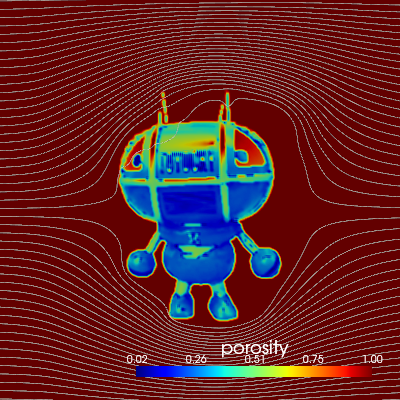

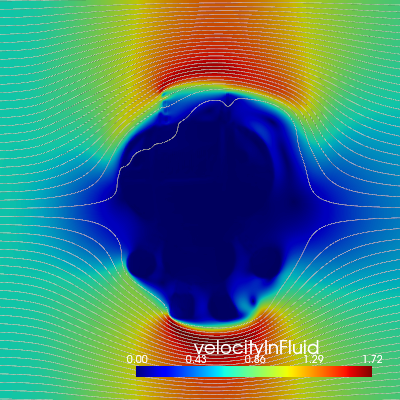

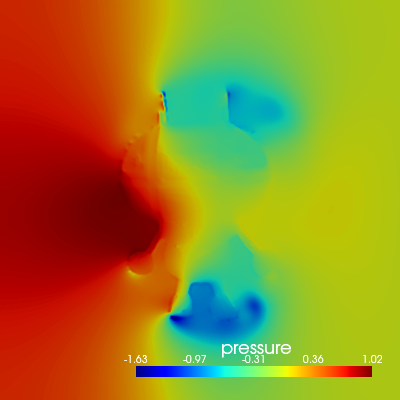

In [ ]:
# @title Display { vertical-output: true }
import pyvista as pv
import math

pv.set_jupyter_backend('static')
pv.global_theme.notebook = True
pv.start_xvfb()

mesh = pv.read('/content/output/output_paraview.vtk')
# mesh.set_active_scalars("velocityInFluid")
# mesh.point_data

# parameter = "velocityInFluid" # @param ["velocityInFluid", "porosity", "pressure"]
parameter = ["porosity", "velocityInFluid",  "pressure"]
porosity_streamline = True #@param ["True", "False"]{type:"raw"}
velocityInFluid_streamline = True #@param ["True", "False"]{type:"raw"}
streamline_points = 50 #@param {type:"integer"}
streamline_width = 0.01 #@param {type:"raw"}
streamline_color = "white" # @param ["white", "red", "black", "yellow", "blue", "green"]
font_color = "white" # @param ["white", "red", "black", "yellow", "blue", "green"]
zoom = 1.5 #@param {type:"raw"}

for param in parameter:
  dargs = dict(
      scalars=param,
      cmap="jet",
      show_scalar_bar=False,
      opacity=1,
  )

  dargs_scalar = dict(
      color=font_color,
      interactive=True,
      vertical=False,
      title_font_size=18,
      label_font_size=10,
      outline=False,
      fmt='%5.2f',
  )

  pl2 = pv.Plotter(window_size=(400, 400))

  if param == 'velocityInFluid' and velocityInFluid_streamline:
    streamlines = mesh.streamlines(
      'velocityInFluid',
      pointa=(-math.floor(l/2), -l/2, 0),
      pointb=(-math.floor(l/2), l/2, 0),
      n_points=streamline_points,
      max_time=100.0,
      progress_bar=False,
      )
    pl2.add_mesh(streamlines.tube(radius=streamline_width), color=streamline_color)
  elif param == 'porosity' and porosity_streamline:
    streamlines = mesh.streamlines(
      'velocityInFluid',
      pointa=(-math.floor(l/2), -l/2, 0),
      pointb=(-math.floor(l/2), l/2, 0),
      n_points=streamline_points,
      max_time=100.0,
      progress_bar=False,
      )
    pl2.add_mesh(streamlines.tube(radius=streamline_width), color=streamline_color)

  pl2.add_mesh(mesh, **dargs)
  pl2.add_scalar_bar(param, **dargs_scalar)

  pl2.camera_position = 'xy'
  pl2.camera.roll += 180
  pl2.camera.azimuth = 180
  pl2.camera.zoom(zoom)

  pl2.show(screenshot='/content/output/%s.png'%(param))

## Reference

[1] 大島, 中道, ジョ,『物体の2次元画像データを直接用いた新しい流体シミュレーションのアプローチ』, 第37回数値流体力学シンポジウム. (2023)

[2] 大島, 流れの数値解析:固体境界が埋め込まれ
た改良ナビエ・ストークス方程式の解法, 北海道大
学学術成果コレクション(HUBCAP), 資源タイプ
software (2023), URL: https://eprints.lib.hokudai.ac.jp/dspace/handle/2115/89344

# LICENSE

MIT License

Copyright (c) 2023 Nobuto NAKAMICHI

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.